<a href="https://colab.research.google.com/github/beingshub02/Deep-Learning-Summer-School-IIITDM/blob/main/25DLS408week_3_day_1_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1st question


Epoch 1/200, Loss D: 1.0504159927368164, Loss G: 0.6831190586090088
Epoch 2/200, Loss D: 0.8729695081710815, Loss G: 0.6190255880355835
Epoch 3/200, Loss D: 0.9800482392311096, Loss G: 0.49956974387168884
Epoch 4/200, Loss D: 1.0910154581069946, Loss G: 0.4574124217033386
Epoch 5/200, Loss D: 1.1574660539627075, Loss G: 0.4815390706062317
Epoch 6/200, Loss D: 1.2274547815322876, Loss G: 0.4944491982460022
Epoch 7/200, Loss D: 1.271125078201294, Loss G: 0.5012682676315308
Epoch 8/200, Loss D: 1.3095842599868774, Loss G: 0.5146001577377319
Epoch 9/200, Loss D: 1.3371567726135254, Loss G: 0.549599826335907
Epoch 10/200, Loss D: 1.3561842441558838, Loss G: 0.5675011873245239
Epoch 11/200, Loss D: 1.3651165962219238, Loss G: 0.5888273119926453
Epoch 12/200, Loss D: 1.3697259426116943, Loss G: 0.6109737157821655
Epoch 13/200, Loss D: 1.370137333869934, Loss G: 0.6317909955978394
Epoch 14/200, Loss D: 1.377338171005249, Loss G: 0.6490353345870972
Epoch 15/200, Loss D: 1.3922362327575684, Loss

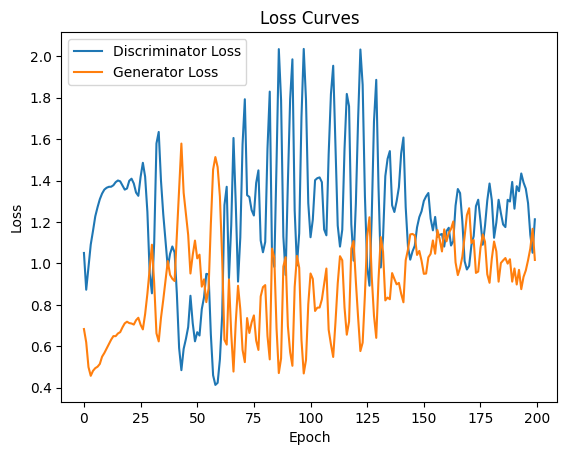

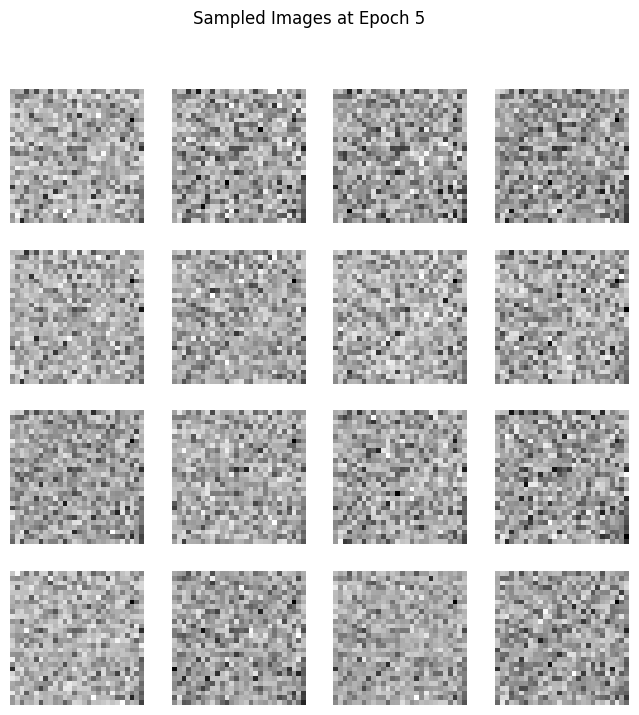

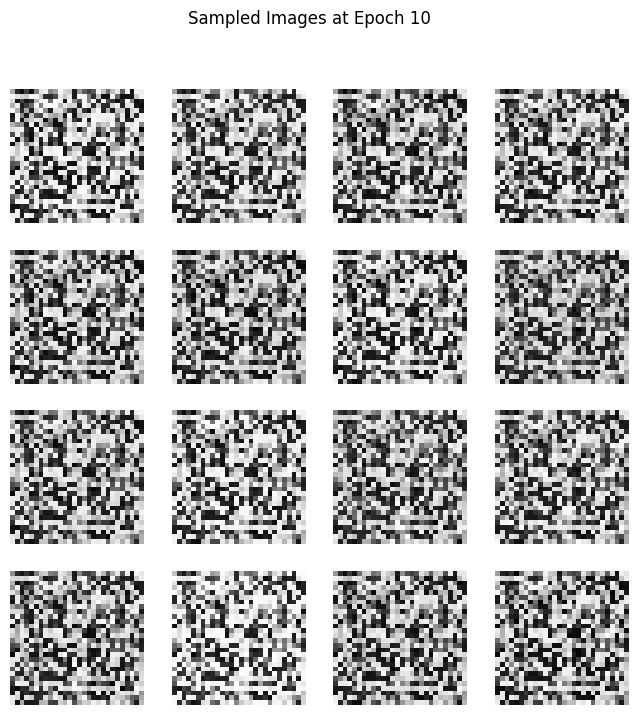

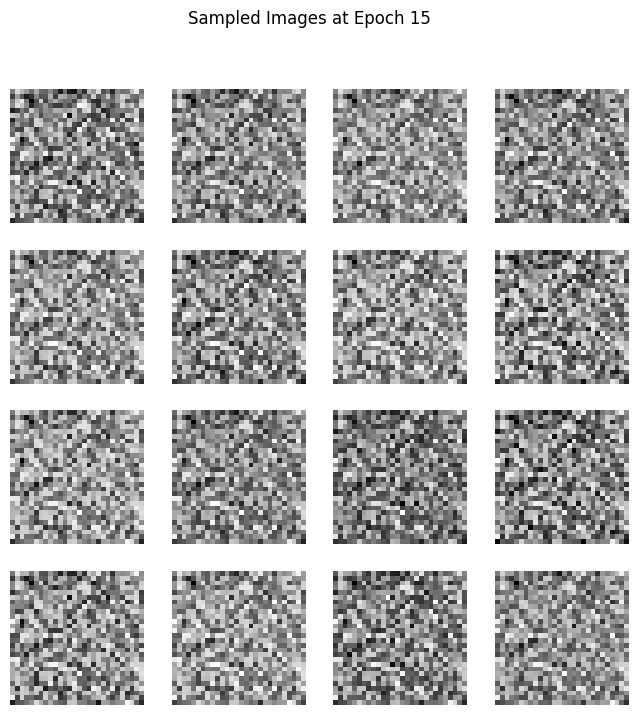

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the Generator
class Generator:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.weights1 = nn.Parameter(torch.randn(input_dim, hidden_dim) * 0.01)
        self.bias1 = nn.Parameter(torch.zeros(hidden_dim))
        self.weights2 = nn.Parameter(torch.randn(hidden_dim, output_dim) * 0.01)
        self.bias2 = nn.Parameter(torch.zeros(output_dim))

    def forward(self, z):
        self.hidden = torch.relu(z @ self.weights1 + self.bias1)
        self.output = torch.tanh(self.hidden @ self.weights2 + self.bias2)
        return self.output

# Define the Discriminator
class Discriminator:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.weights1 = nn.Parameter(torch.randn(input_dim, hidden_dim) * 0.01)
        self.bias1 = nn.Parameter(torch.zeros(hidden_dim))
        self.weights2 = nn.Parameter(torch.randn(hidden_dim, output_dim) * 0.01)
        self.bias2 = nn.Parameter(torch.zeros(output_dim))

    def forward(self, x):
        self.hidden = torch.nn.functional.leaky_relu(x @ self.weights1 + self.bias1, negative_slope=0.2)
        self.output = torch.sigmoid(self.hidden @ self.weights2 + self.bias2)
        return self.output

# Binary Cross Entropy Loss
def binary_cross_entropy(y_pred, y_true):
    return -(y_true * torch.log(y_pred + 1e-10) + (1 - y_true) * torch.log(1 - y_pred + 1e-10)).mean()

# Initialize parameters
latent_dim = 64
hidden_dim = 128
output_dim = 784  # MNIST image size (28x28)

# Instantiate models
generator = Generator(latent_dim, hidden_dim, output_dim)
discriminator = Discriminator(output_dim, hidden_dim, 1)

# Optimizers
g_params = [generator.weights1, generator.bias1, generator.weights2, generator.bias2]
d_params = [discriminator.weights1, discriminator.bias1, discriminator.weights2, discriminator.bias2]
optimizer_g = optim.Adam(g_params, lr=0.0002)
optimizer_d = optim.Adam(d_params, lr=0.0002)

# Simulate a toy dataset
real_data = torch.rand(1000, output_dim)
batch_size = 64
epochs = 200

losses_g = []
losses_d = []
sampled_images = []

# Training loop
for epoch in range(epochs):
    for i in range(0, len(real_data), batch_size):
        # Real data
        real_batch = real_data[i:i + batch_size]
        real_labels = torch.ones(real_batch.size(0), 1)

        # Fake data
        z = torch.randn(real_batch.size(0), latent_dim)
        fake_data = generator.forward(z)
        fake_labels = torch.zeros(fake_data.size(0), 1)

        # Discriminator forward pass
        d_real = discriminator.forward(real_batch)
        d_fake = discriminator.forward(fake_data.detach())

        # Discriminator loss
        loss_d = binary_cross_entropy(d_real, real_labels) + binary_cross_entropy(d_fake, fake_labels)

        # Backward pass for discriminator
        optimizer_d.zero_grad()
        loss_d.backward()
        optimizer_d.step()

        # Generator forward pass
        d_fake = discriminator.forward(fake_data)

        # Generator loss
        loss_g = binary_cross_entropy(d_fake, real_labels)

        # Backward pass for generator
        optimizer_g.zero_grad()
        loss_g.backward()
        optimizer_g.step()

    losses_d.append(loss_d.item())
    losses_g.append(loss_g.item())

    # Sample images at specified epochs
    if epoch in [5, 50, 100, 200]:
        with torch.no_grad():
            z = torch.randn(16, latent_dim)
            sampled_images.append(generator.forward(z).view(-1, 28, 28).numpy())

    print(f"Epoch {epoch + 1}/{epochs}, Loss D: {loss_d.item()}, Loss G: {loss_g.item()}")

# Plot loss curves
plt.plot(losses_d, label='Discriminator Loss')
plt.plot(losses_g, label='Generator Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.show()

# Visualize sampled images at specified epochs
for i, images in enumerate(sampled_images):
    fig, axs = plt.subplots(4, 4, figsize=(8, 8))
    fig.suptitle(f'Sampled Images at Epoch {5 * (i + 1)}')
    for ax, img in zip(axs.flatten(), images):
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    plt.show()


2nd question

Epoch 1/200, Loss D: 1.0289020538330078, Loss G: 0.6816797256469727
Epoch 2/200, Loss D: 0.8664624094963074, Loss G: 0.6148144006729126
Epoch 3/200, Loss D: 0.9765322804450989, Loss G: 0.5016007423400879
Epoch 4/200, Loss D: 1.0973331928253174, Loss G: 0.45720428228378296
Epoch 5/200, Loss D: 1.1709420680999756, Loss G: 0.4800698757171631
Epoch 6/200, Loss D: 1.221813678741455, Loss G: 0.50383460521698
Epoch 7/200, Loss D: 1.29080331325531, Loss G: 0.49470609426498413
Epoch 8/200, Loss D: 1.3160369396209717, Loss G: 0.5205212831497192
Epoch 9/200, Loss D: 1.3398871421813965, Loss G: 0.5388621091842651
Epoch 10/200, Loss D: 1.3648173809051514, Loss G: 0.5549511909484863
Epoch 11/200, Loss D: 1.3562220335006714, Loss G: 0.5914608240127563
Epoch 12/200, Loss D: 1.3620238304138184, Loss G: 0.6071280837059021
Epoch 13/200, Loss D: 1.3686628341674805, Loss G: 0.6307126879692078
Epoch 14/200, Loss D: 1.3882434368133545, Loss G: 0.6324828863143921
Epoch 15/200, Loss D: 1.4003479480743408, Loss

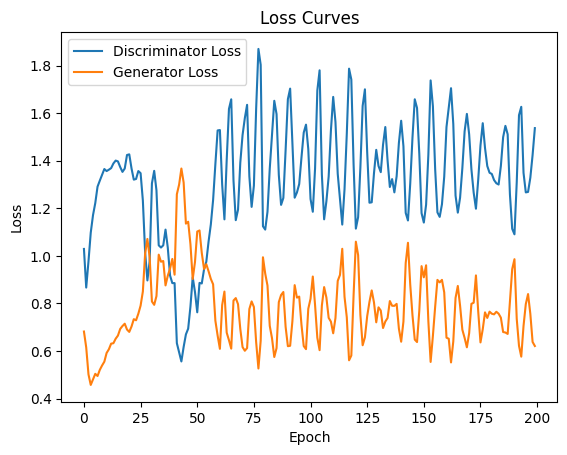

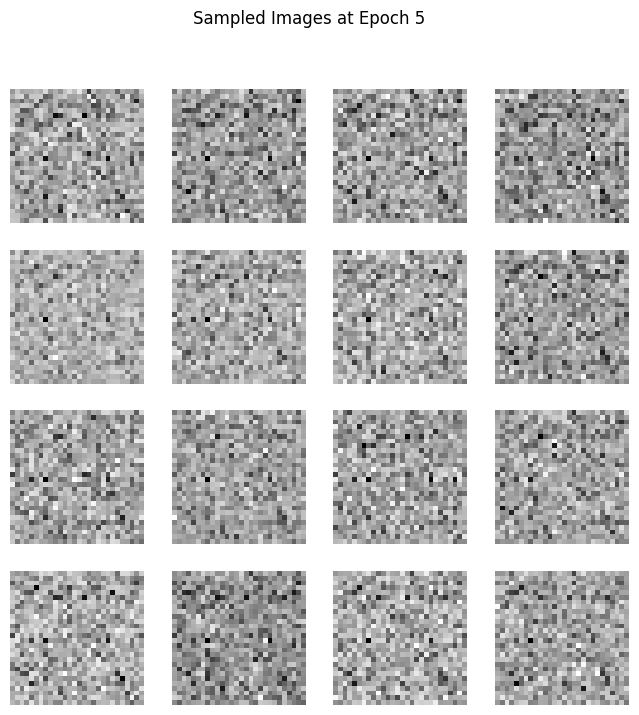

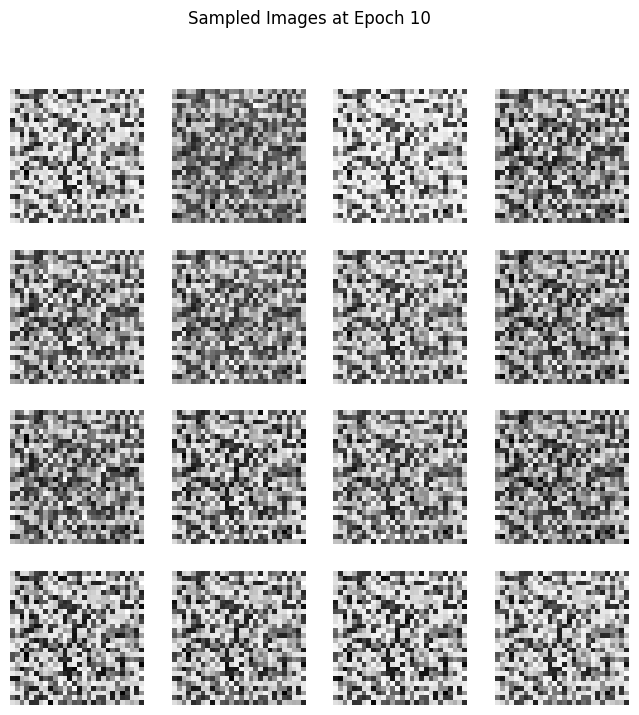

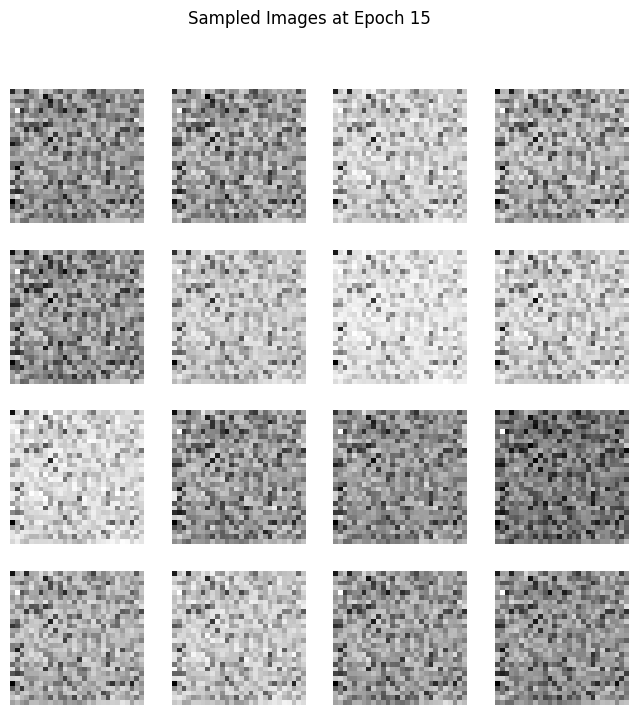

Generated 1000 synthetic images and saved to 'generated_images'.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import os
from torchvision.utils import save_image

# Define the Generator
class Generator:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.weights1 = nn.Parameter(torch.randn(input_dim, hidden_dim) * 0.01)
        self.bias1 = nn.Parameter(torch.zeros(hidden_dim))
        self.weights2 = nn.Parameter(torch.randn(hidden_dim, output_dim) * 0.01)
        self.bias2 = nn.Parameter(torch.zeros(output_dim))

    def forward(self, z):
        self.hidden = torch.relu(z @ self.weights1 + self.bias1)
        self.output = torch.tanh(self.hidden @ self.weights2 + self.bias2)
        return self.output

# Define the Discriminator
class Discriminator:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.weights1 = nn.Parameter(torch.randn(input_dim, hidden_dim) * 0.01)
        self.bias1 = nn.Parameter(torch.zeros(hidden_dim))
        self.weights2 = nn.Parameter(torch.randn(hidden_dim, output_dim) * 0.01)
        self.bias2 = nn.Parameter(torch.zeros(output_dim))

    def forward(self, x):
        self.hidden = torch.nn.functional.leaky_relu(x @ self.weights1 + self.bias1, negative_slope=0.2)
        self.output = torch.sigmoid(self.hidden @ self.weights2 + self.bias2)
        return self.output

# Binary Cross Entropy Loss
def binary_cross_entropy(y_pred, y_true):
    return -(y_true * torch.log(y_pred + 1e-10) + (1 - y_true) * torch.log(1 - y_pred + 1e-10)).mean()

# Initialize parameters
latent_dim = 64
hidden_dim = 128
output_dim = 784  # MNIST image size (28x28)

# Instantiate models
generator = Generator(latent_dim, hidden_dim, output_dim)
discriminator = Discriminator(output_dim, hidden_dim, 1)

# Optimizers
g_params = [generator.weights1, generator.bias1, generator.weights2, generator.bias2]
d_params = [discriminator.weights1, discriminator.bias1, discriminator.weights2, discriminator.bias2]
optimizer_g = optim.Adam(g_params, lr=0.0002)
optimizer_d = optim.Adam(d_params, lr=0.0002)

# Simulate a toy dataset
real_data = torch.rand(1000, output_dim)
batch_size = 64
epochs = 200

losses_g = []
losses_d = []
sampled_images = []

# Training loop
for epoch in range(epochs):
    for i in range(0, len(real_data), batch_size):
        # Real data
        real_batch = real_data[i:i + batch_size]
        real_labels = torch.ones(real_batch.size(0), 1)

        # Fake data
        z = torch.randn(real_batch.size(0), latent_dim)
        fake_data = generator.forward(z)
        fake_labels = torch.zeros(fake_data.size(0), 1)

        # Discriminator forward pass
        d_real = discriminator.forward(real_batch)
        d_fake = discriminator.forward(fake_data.detach())

        # Discriminator loss
        loss_d = binary_cross_entropy(d_real, real_labels) + binary_cross_entropy(d_fake, fake_labels)

        # Backward pass for discriminator
        optimizer_d.zero_grad()
        loss_d.backward()
        optimizer_d.step()

        # Generator forward pass
        d_fake = discriminator.forward(fake_data)

        # Generator loss
        loss_g = binary_cross_entropy(d_fake, real_labels)

        # Backward pass for generator
        optimizer_g.zero_grad()
        loss_g.backward()
        optimizer_g.step()

    losses_d.append(loss_d.item())
    losses_g.append(loss_g.item())

    # Sample images at specified epochs
    if epoch in [5, 50, 100, 200]:
        with torch.no_grad():
            z = torch.randn(16, latent_dim)
            sampled_images.append(generator.forward(z).view(-1, 28, 28).numpy())

    print(f"Epoch {epoch + 1}/{epochs}, Loss D: {loss_d.item()}, Loss G: {loss_g.item()}")

# Plot loss curves
plt.plot(losses_d, label='Discriminator Loss')
plt.plot(losses_g, label='Generator Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.show()

# Visualize sampled images at specified epochs
for i, images in enumerate(sampled_images):
    fig, axs = plt.subplots(4, 4, figsize=(8, 8))
    fig.suptitle(f'Sampled Images at Epoch {5 * (i + 1)}')
    for ax, img in zip(axs.flatten(), images):
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    plt.show()

# Generate new synthetic images
output_dir = "generated_images"
os.makedirs(output_dir, exist_ok=True)

num_samples = 1000
z = torch.randn(num_samples, latent_dim)
synthetic_images = generator.forward(z).view(-1, 1, 28, 28)

for i, img in enumerate(synthetic_images):
    save_image(img, os.path.join(output_dir, f"img_{i + 1}.png"))

print(f"Generated {num_samples} synthetic images and saved to '{output_dir}'.")


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Simple classifier definition
class Classifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training function
def train_classifier(model, data, labels, epochs=50, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels.argmax(dim=1))
        loss.backward()
        optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Assume input_dim is size of flattened images, e.g. 28*28=784 for MNIST
input_dim = 784
hidden_dim = 128
output_dim = 2

# Fake original data (e.g. real MNIST flattened, 100 samples)
num_samples = 100
real_data = torch.randn(num_samples, input_dim)
real_labels = torch.zeros(num_samples, output_dim)
real_labels[:, 0] = 1  # Class 0 for original

# Fake generator producing synthetic images
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )
    def forward(self, z):
        return self.fc(z)

latent_dim = 100
generator = Generator(latent_dim, input_dim)

# Generate synthetic data WITHOUT gradient tracking
with torch.no_grad():
    z = torch.randn(num_samples, latent_dim)
    synthetic_data = generator(z)  # No gradient tracking here

synthetic_labels = torch.zeros(num_samples, output_dim)
synthetic_labels[:, 1] = 1  # Class 1 for synthetic

# Combine original and synthetic data and labels
augmented_data = torch.cat([real_data, synthetic_data])
augmented_labels = torch.cat([real_labels, synthetic_labels])

# Shuffle data & labels together
perm = torch.randperm(augmented_data.size(0))
augmented_data = augmented_data[perm]
augmented_labels = augmented_labels[perm]

# Detach tensors to make sure no graph is tracked
augmented_data = augmented_data.detach()
augmented_labels = augmented_labels.detach()

# Train classifier on original data
classifier_original = Classifier(input_dim, hidden_dim, output_dim)
print("Training classifier on original dataset:")
train_classifier(classifier_original, real_data, real_labels)

# Train classifier on augmented data
classifier_augmented = Classifier(input_dim, hidden_dim, output_dim)
print("\nTraining classifier on augmented dataset:")
train_classifier(classifier_augmented, augmented_data, augmented_labels)


Training classifier on original dataset:
Epoch 10/50, Loss: 0.11883269995450974
Epoch 20/50, Loss: 0.017754461616277695
Epoch 30/50, Loss: 0.004865816328674555
Epoch 40/50, Loss: 0.002335250610485673
Epoch 50/50, Loss: 0.0015556890284642577

Training classifier on augmented dataset:
Epoch 10/50, Loss: 0.10689132660627365
Epoch 20/50, Loss: 0.010573216713964939
Epoch 30/50, Loss: 0.0024570890236645937
Epoch 40/50, Loss: 0.0011516268132254481
Epoch 50/50, Loss: 0.0007821976905688643
